# DATA ANALYSIS

In [1]:
n = 7000
data_file = "data_"

## Read data

In [2]:
results <- data.frame()
for(i in 1:4){
    file_name = paste(data_file, i, ".txt", sep="")
    results <- rbind(results, read.table(file_name, header = 0, row.names = NULL)$V1)
}
results <- t(results)
rownames(results) <- 1:n
colnames(results) <- 1:4

## Checking mean, median, and variance

In [3]:
tmp <- as.matrix(cbind(
                    sapply(1:4, FUN = function(x) mean(results[,x])), 
                    sapply(1:4, FUN = function(x) median(results[,x])), 
                    sapply(1:4, FUN = function(x) var(results[,x]))))
                           
colnames(tmp) <- c("mean", "median", "variance")
rownames(tmp) <- c("Arithmetic", "Binomial", "BLX-alpha", "Eigen-BB")                           
tmp
               

,mean,median,variance
Arithmetic,19.00842,18.91599,7.670394
Binomial,38.07608,38.29876,14.043913
BLX-alpha,42.55691,42.75942,9.945040
Eigen-BB,21.82032,21.64873,31.169472


## Visualizing

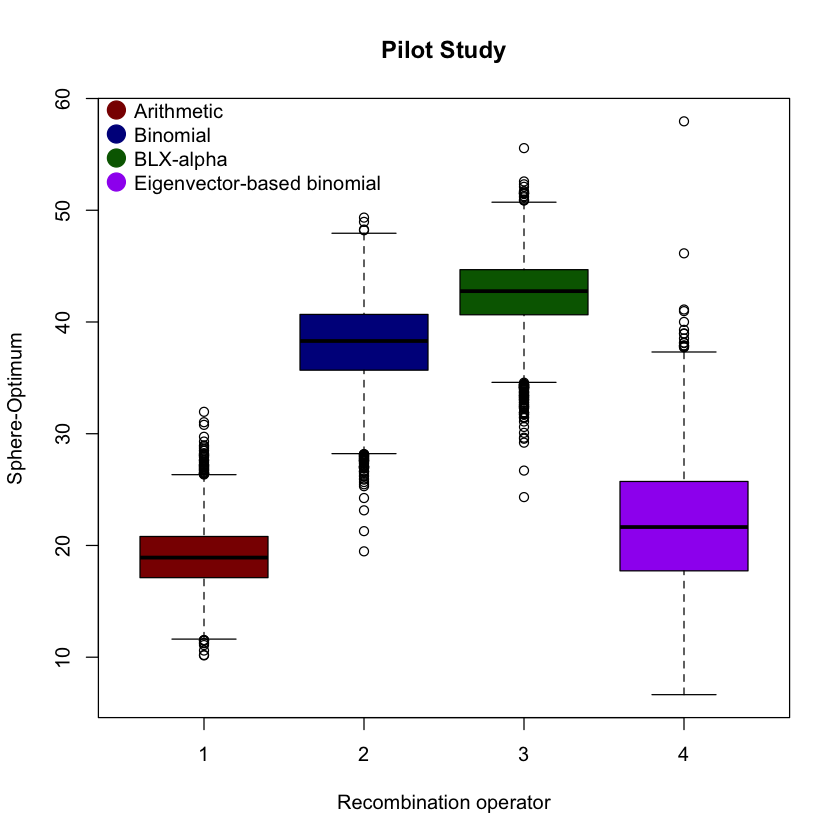

In [4]:
boxplot(results, main="Pilot Study", ylab = "Sphere-Optimum", xlab="Recombination operator", col=c("darkred","darkblue","darkgreen", "purple"))
 legend("topleft", legend = c("Arithmetic","Binomial", "BLX-alpha", "Eigenvector-based binomial") ,col = c("darkred","darkblue","darkgreen", "purple"), 
        bty = "n", pch=20 , pt.cex = 3, cex = 1, horiz = FALSE, inset = c(0.00, -0.02))

# ANOVA

In [8]:
res <- data.frame(results)

my.model <- aov(values ~ ind, data=stack(res))
summary.aov(my.model)

               Df  Sum Sq Mean Sq F value Pr(>F)    
ind             3 2870611  956870   60919 <2e-16 ***
Residuals   27996  439739      16                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Pairwise T-Test

In [15]:
sig.adj2 = 1 - (1 - 0.05)^(1/6)

t.test(x=res$X1, y=res$X2, paired=FALSE, alternative="less", sign.level = sig.adj2)
t.test(x=res$X1, y=res$X3, paired=FALSE, alternative="less", sign.level = sig.adj2)
t.test(x=res$X1, y=res$X4, paired=FALSE, alternative="less", sign.level = sig.adj2)

t.test(x=res$X2, y=res$X3, paired=FALSE, alternative="less", sign.level = sig.adj2)
t.test(x=res$X2, y=res$X4, paired=FALSE, alternative="less", sign.level = sig.adj2)

t.test(x=res$X3, y=res$X4, paired=FALSE, alternative="less", sign.level = sig.adj2)


	Welch Two Sample t-test

data:  res$X1 and res$X2
t = -342.35, df = 12888, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -18.97605
sample estimates:
mean of x mean of y 
 19.00842  38.07608 



	Welch Two Sample t-test

data:  res$X1 and res$X3
t = -469.42, df = 13768, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -23.46598
sample estimates:
mean of x mean of y 
 19.00842  42.55691 



	Welch Two Sample t-test

data:  res$X1 and res$X4
t = -37.749, df = 10247, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.689365
sample estimates:
mean of x mean of y 
 19.00842  21.82032 



	Welch Two Sample t-test

data:  res$X2 and res$X3
t = -76.542, df = 13601, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -4.384533
sample estimates:
mean of x mean of y 
 38.07608  42.55691 



	Welch Two Sample t-test

data:  res$X2 and res$X4
t = 202.27, df = 12242, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 16.38797
sample estimates:
mean of x mean of y 
 38.07608  21.82032 



	Welch Two Sample t-test

data:  res$X3 and res$X4
t = 270.58, df = 11053, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 20.86267
sample estimates:
mean of x mean of y 
 42.55691  21.82032 


## Assumptions

## 1) Normality of residuals

              Df Sum Sq Mean Sq F value Pr(>F)    
ind            3 492469  164156   10516 <2e-16 ***
Residuals   4796  74867      16                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  my.model$residuals
W = 0.99374, p-value = 1.193e-13


[1] 4655 3803

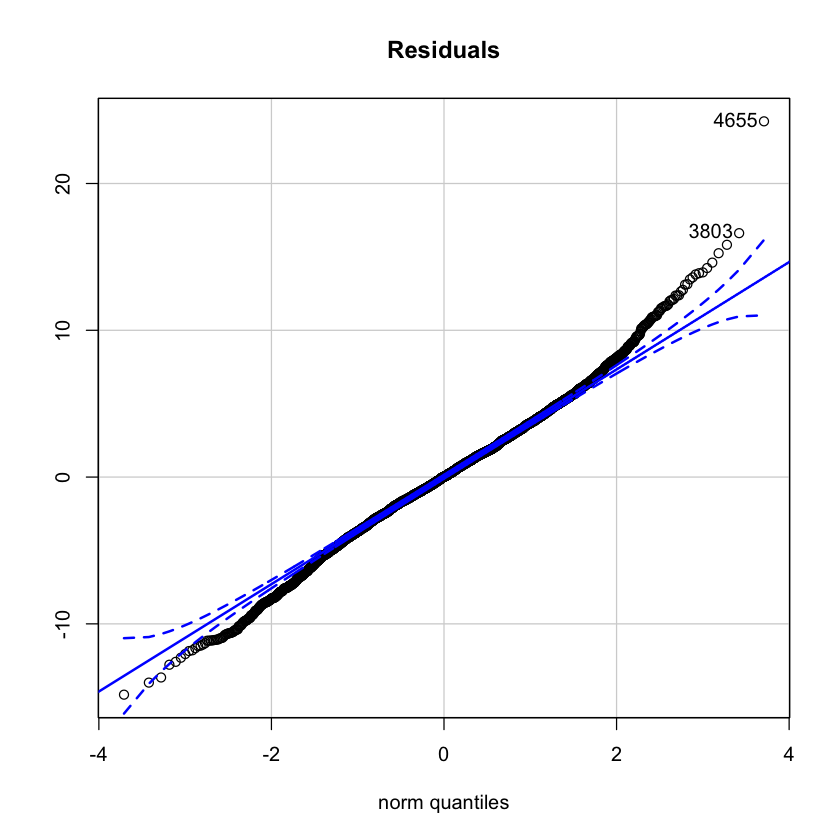

In [30]:
library("car")
res <- data.frame(results[1:1200,])

my.model <- aov(values ~ ind, data=stack(res))
summary.aov(my.model)

shapiro.test(my.model$residuals)
qqPlot(my.model$residuals, main="Residuals", ylab="")

## 2) Homoscedasticity


	Fligner-Killeen test of homogeneity of variances

data:  values by ind
Fligner-Killeen:med chi-squared = 559.99, df = 3, p-value < 2.2e-16


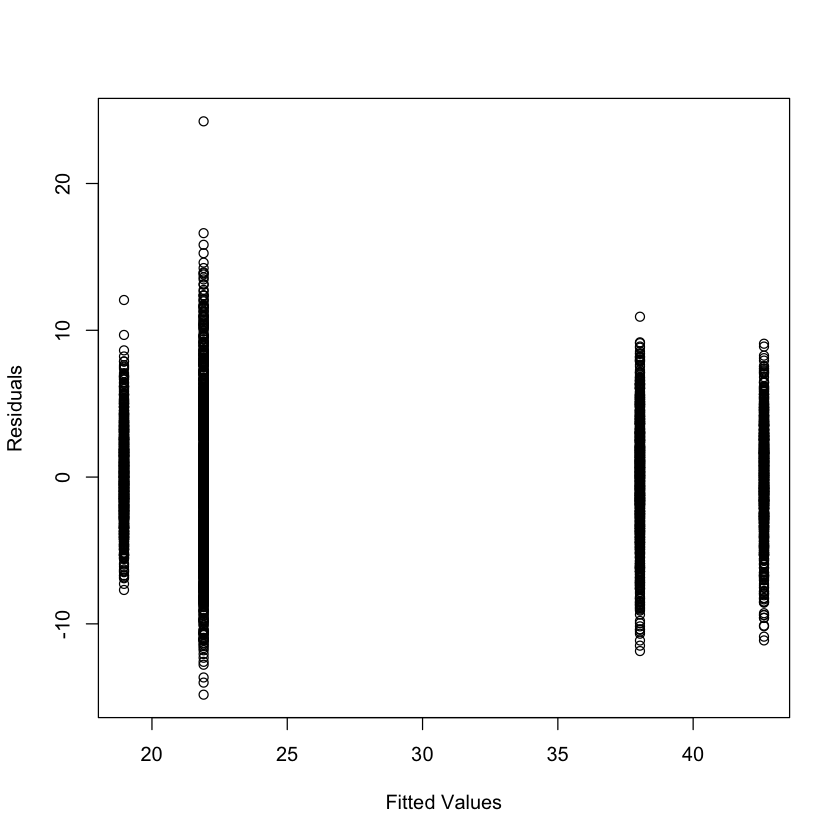

In [32]:
fligner.test(values ~ ind, stack(res))
plot(x=my.model$fitted.values, y=my.model$residuals, xlab = "Fitted Values", ylab="Residuals")

## Kruskal Wallis and Pairwise Wilcox

In [35]:
kruskal.test(values ~ ind, data=stack(res))
pairwise.wilcox.test(stack(res)$values, stack(res)$ind, p.adjust.method = "bonferroni", alternative="greater")


	Kruskal-Wallis rank sum test

data:  values by ind
Kruskal-Wallis chi-squared = 3814.1, df = 3, p-value < 2.2e-16



	Pairwise comparisons using Wilcoxon rank sum test 

data:  stack(res)$values and stack(res)$ind 

   X1     X2     X3
X2 <2e-16 -      - 
X3 <2e-16 <2e-16 - 
X4 <2e-16 1      1 

P value adjustment method: bonferroni 